In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:37<00:00, 33.0MB/s]
100% 1.06G/1.06G [00:37<00:00, 30.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

In [17]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

In [18]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
conv_base.trainable = False

In [20]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Data Augmentation

In [21]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [24]:
history = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator)

Epoch 1/15
625/625 [==============================] - 375s 590ms/step - loss: 0.3317 - accuracy: 0.8538 - val_loss: 0.1671 - val_accuracy: 0.9278
Epoch 2/15
625/625 [==============================] - 353s 565ms/step - loss: 0.2202 - accuracy: 0.9079 - val_loss: 0.1481 - val_accuracy: 0.9382
Epoch 3/15
625/625 [==============================] - 354s 567ms/step - loss: 0.1847 - accuracy: 0.9244 - val_loss: 0.1501 - val_accuracy: 0.9348
Epoch 4/15
625/625 [==============================] - 352s 562ms/step - loss: 0.1778 - accuracy: 0.9284 - val_loss: 0.1456 - val_accuracy: 0.9356
Epoch 5/15
625/625 [==============================] - 369s 591ms/step - loss: 0.1676 - accuracy: 0.9290 - val_loss: 0.1801 - val_accuracy: 0.9262
Epoch 6/15
625/625 [==============================] - 349s 559ms/step - loss: 0.1673 - accuracy: 0.9320 - val_loss: 0.1421 - val_accuracy: 0.9368
Epoch 7/15
625/625 [==============================] - 349s 558ms/step - loss: 0.1545 - accuracy: 0.9377 - val_loss: 0.1397 -

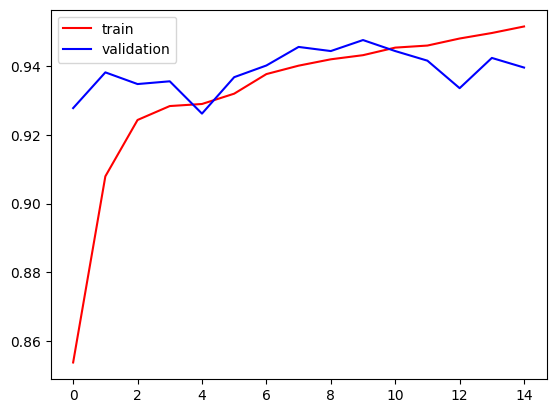

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

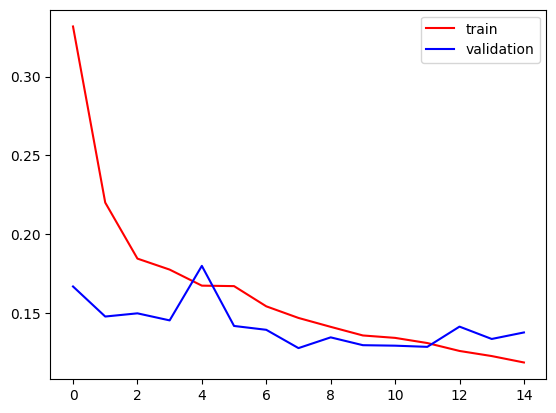

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()